C:\Users\Lenovo\OneDrive\Desktop\creditfraud\venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:35:14] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[[110638     77]
 [   202    227]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    110715
           1       0.75      0.53      0.62       429

    accuracy                           1.00    111144
   macro avg       0.87      0.76      0.81    111144
weighted avg       1.00      1.00      1.00    111144



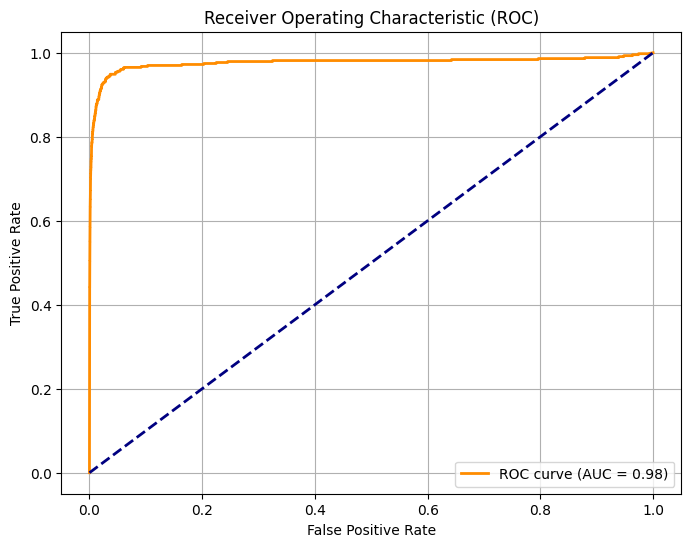

['../models/xgboost_model.pkl']

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
import joblib
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


# Load data
df = pd.read_csv('../data/fraudTest.csv')

# Select relevant features
features = ['category', 'amt', 'gender', 'city_pop']
target = 'is_fraud'

# Encode categorical columns
df['gender'] = LabelEncoder().fit_transform(df['gender'])
df['category'] = LabelEncoder().fit_transform(df['category'])

X = df[features]
y = df[target]

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Train model
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)

# Evaluate
print(confusion_matrix(y_test, model.predict(X_test)))
print(classification_report(y_test, model.predict(X_test)))
# Predict probabilities
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Save model
joblib.dump(model, '../models/xgboost_model.pkl')